In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the first exercise and save the final dataset.

In [9]:
df = pd.read_csv('students_score_rijeseno.csv')
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,female,3,2,standard,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
29113,male,4,2,standard,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
29114,female,2,2,free/reduced,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0
29115,female,3,0,standard,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0


2. a) Draw a histogram of values for the feature MathScore. Set the number of bins to 20. <br>
   b) With a vertical dashed red line denote the median value and with a vertical dashed green line denote the mean value. Set labels for each.<br>
   c) Title the figure "MathScore Histogram". Add proper x and y axis labels. <br>
   d) Add a grid. <br>
   e) Add a legend, place it in the top left corner.

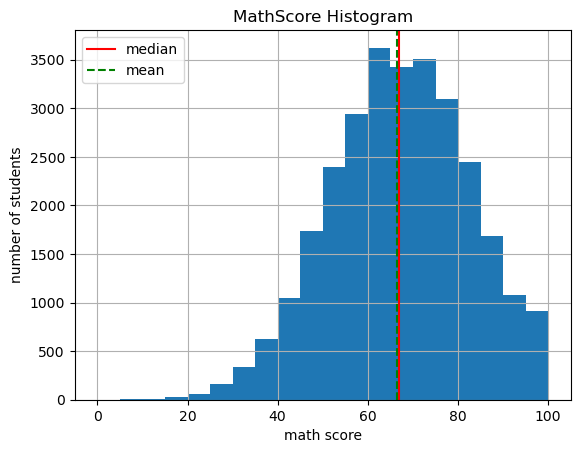

In [10]:
plt.hist(df.MathScore, bins=20)
plt.axvline(df.MathScore.median(), color = 'red', label = "median")
plt.axvline(df.MathScore.mean(), color = 'green', label = "mean", linestyle = 'dashed')
plt.title("MathScore Histogram")
plt.xlabel("math score")
plt.ylabel("number of students")
plt.grid()
plt.legend(loc='upper left')
plt.show()

3. a) Make a pie chart of the feature NrSiblings. <br>
   b) Display the labels for each wedge. <br>
   c) Display the percentages within edge wedge. <br>
   d) Title the figure "NrSiblings pie chart".

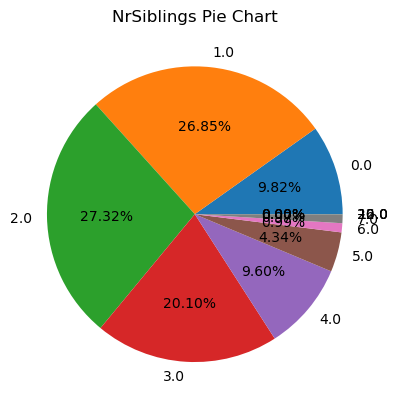

In [4]:
count_per_sibling = df.groupby('NrSiblings').count().loc[:,'Gender'].values
labels = df.groupby('NrSiblings').count().index.values
percent = (count_per_sibling/len(df))*100
plt.title('NrSiblings Pie Chart')
plt.pie(percent, labels=labels, autopct='%.2f%%')
plt.show()

4. a) Create a bar chart of the average ReadingScore for each ParentEduc group. <br>
   b) Color each bar in a different color. Set the transparency of the bars to 0.7 <br>
   c) Calculate the standard deviation of the ReadingScore and add a vertical errorbar to the bar tips.

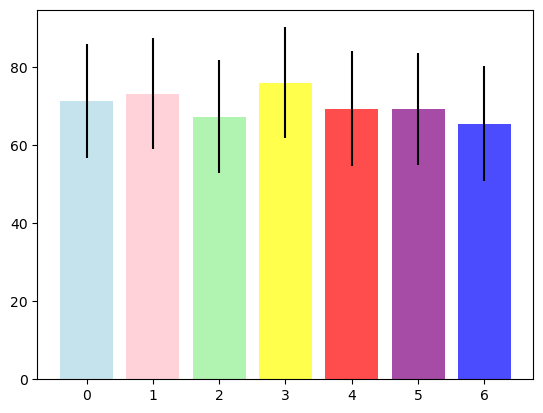

In [5]:
average_reading_score = df.groupby('ParentEduc')['ReadingScore'].mean() #for each parent group - mean of reading
parent_educ_values = average_reading_score.index

color = ['lightblue', 'pink', 'lightgreen', 'yellow', 'red', 'purple', 'blue']
plt.bar(parent_educ_values, average_reading_score, alpha=0.7, color=color) #alpha za transperancy

std_dev = df.groupby('ParentEduc')['ReadingScore'].std()
plt.errorbar(parent_educ_values, average_reading_score, yerr=std_dev, fmt='none', color='black')


#parent_educ_values
#count_per_score = df.groupby('ParentEduc').count().loc[:,'ReadingScore'].values
#count_per_score
#readingscore = df.groupby('ParentEduc').count().index.values
#master_std = X.loc[X.loc[:,'Title'] == 'Master', 'Age'].std()
#plt.bar(readingscore, count_per_score)
plt.show()


5. a) Make a figure divided into 2 rows and 2 columns. Set the figure size to 30 by 30. <br>
   b) In the top left axis:
       1) Draw a line graph of the students' MathScores in descending order.
       2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3.
   c) In the top right axis:
       1) Draw a scatter plot of MathScore vs ReadingScore. 
       2) Make the bubbles representing the female students yellow and the ones representing the male students purple. Add and display labels. Set transparency to 0.1.
       3) Set the size of the bubbles to be 50*NrSiblings.
   d) In the bottom left axis:
       1) Draw a boxplot of the WrittingScore feature values.
       2) Remove fliers from the boxplot.
   e) In the borrom right axis:
       1) Draw a bar plot of the number of students using each transportation method.
       2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren in red and the ones who arent in blue. Add and display labels.

In [6]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore', 'Gender_female', 'Gender_male',
       'LunchType_free/reduced', 'LunchType_standard'],
      dtype='object')

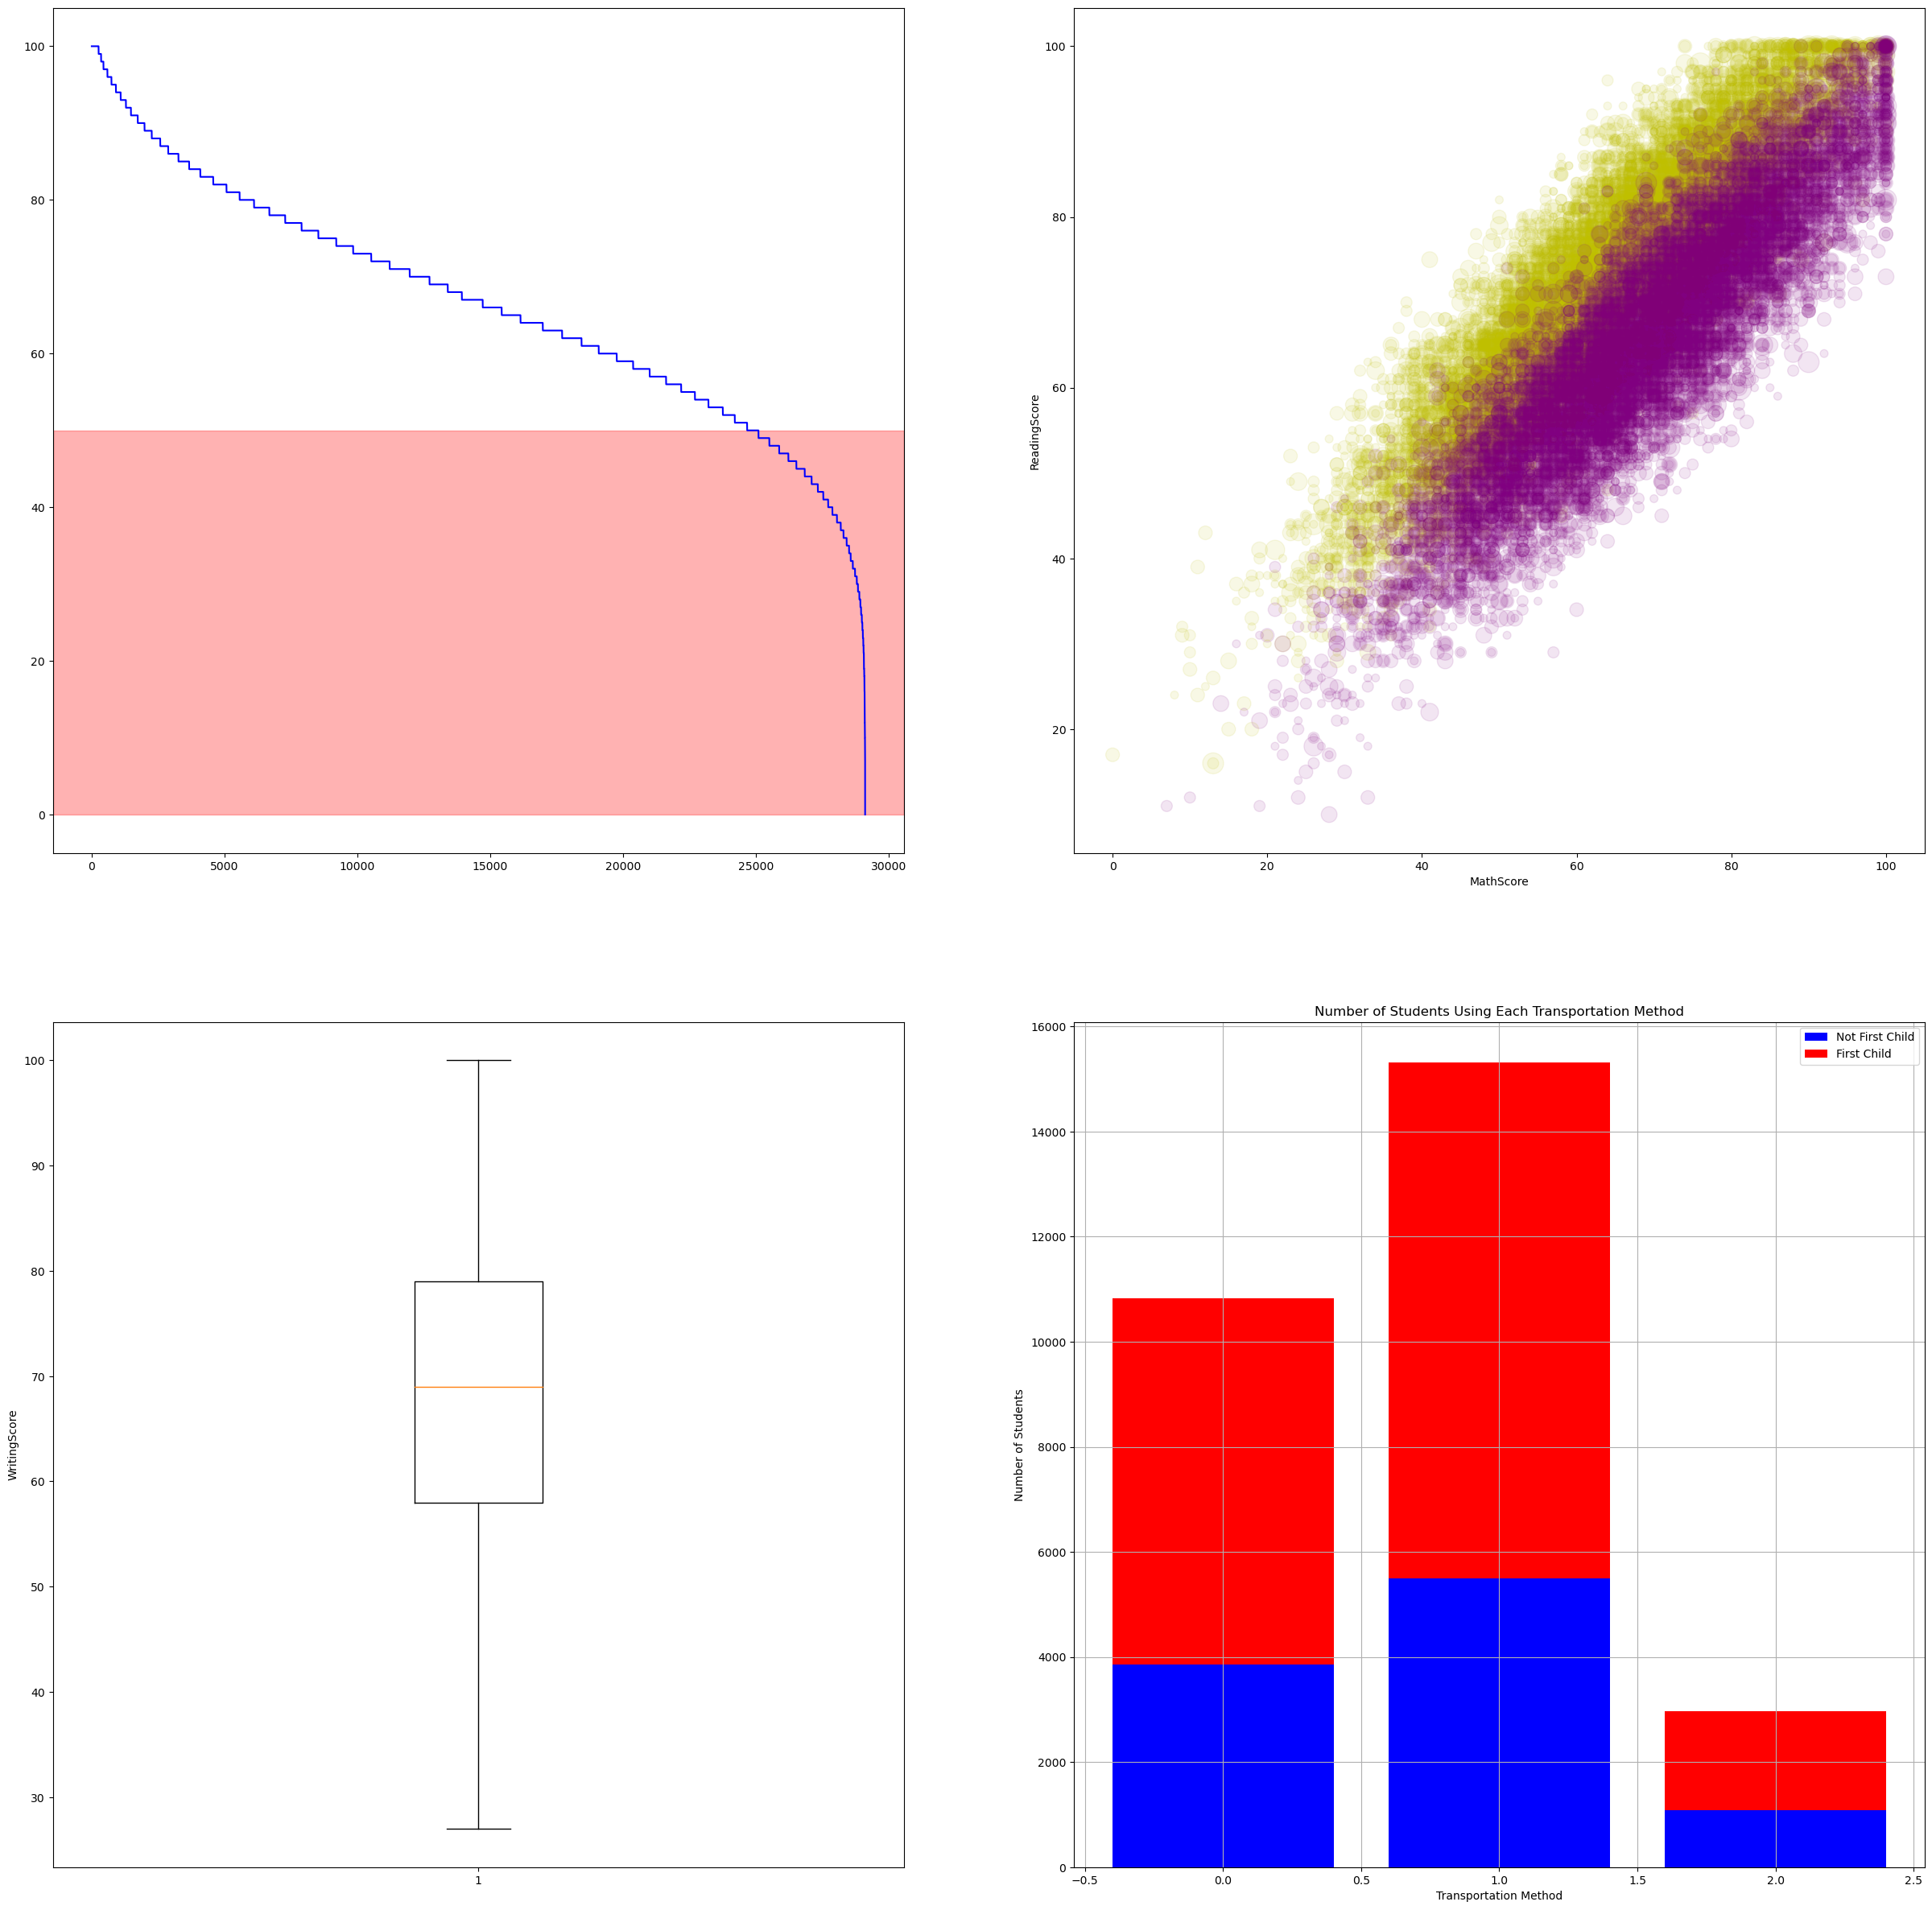

In [7]:
fig, ax = plt.subplots(2,2, figsize=(30,30)) 
df_tmp=df.copy()
sorted_MathScore = df_tmp.sort_values(by=['MathScore'], ascending=False).MathScore.values
ax[0, 0].plot(df_tmp.MathScore.index[sorted_MathScore], color='blue')
ax[0, 0].axhspan(0, 50, color='red', alpha=0.3)


sizes = df.NrSiblings*50
mask_male=df.Gender == 'male'
ax[0, 1].scatter(df.loc[~mask_male,'MathScore'], df.loc[~mask_male,'ReadingScore'], s=sizes[~mask_male], c='y', label='female',alpha=0.1)
ax[0, 1].scatter(df.loc[mask_male,'MathScore'], df.loc[mask_male,'ReadingScore'], s=sizes[mask_male], c='purple',label='male', alpha=0.1)
ax[0, 1].set_xlabel('MathScore')
ax[0, 1].set_ylabel('ReadingScore')
plt.show

ax[1, 0].boxplot(df['WritingScore'], showfliers=False)
ax[1, 0].set_ylabel('WritingScore')


mask_first_child = df.IsFirstChild == 1

# Count the number of students for each combination of 'IsFirstChild' and 'TransportMeans'
count_per_transport_first_child = df[mask_first_child].groupby('TransportMeans').size().values
count_per_transport_not_first_child = df[~mask_first_child].groupby('TransportMeans').size().values
transport_means = df.groupby('TransportMeans').size().index.values

# plot on ax[1, 1]
ax[1, 1].bar(transport_means, count_per_transport_not_first_child, color='blue', label='Not First Child')
ax[1, 1].bar(transport_means, count_per_transport_first_child, color='red', label='First Child', bottom=count_per_transport_not_first_child)

# Additional settings on ax[1, 1]
ax[1, 1].set_xlabel('Transportation Method')
ax[1, 1].set_ylabel('Number of Students')
ax[1, 1].set_title('Number of Students Using Each Transportation Method')
ax[1, 1].legend(loc='best')
ax[1, 1].grid()

6. a) Using seaborn, display a heatmap of the correlation coefficients between the numeric features. <br>
   b) Set the figure size to 20 by 10. <br>
   b) Make the heatmap display 2 decimal places of the values of the correlation coefficients. <br>
   c) Use the "icefire" colormap.

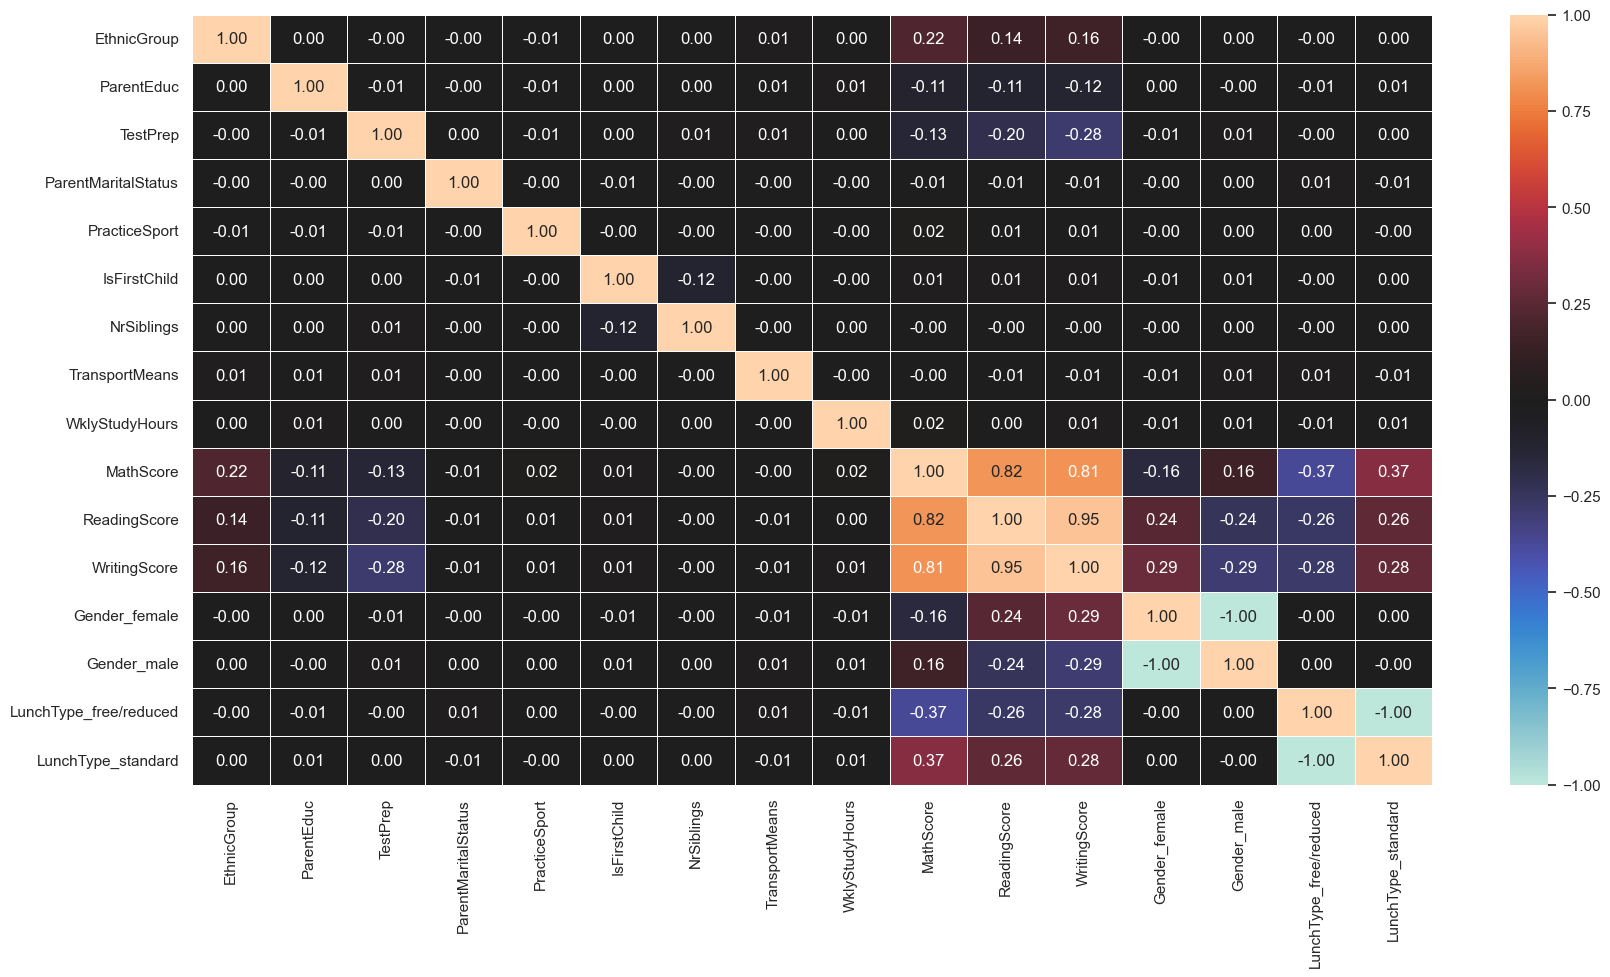

In [11]:
df_numeric = df.loc[:,~df.columns.isin(['Gender', 'LunchType'])]

sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="icefire", linewidths=.5)
plt.show()

7. a) Make a scatterplot matrix of all the features. <br>
   b) Remove mirroring scatter plots. <br>
   c) Hue the plot by gender.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


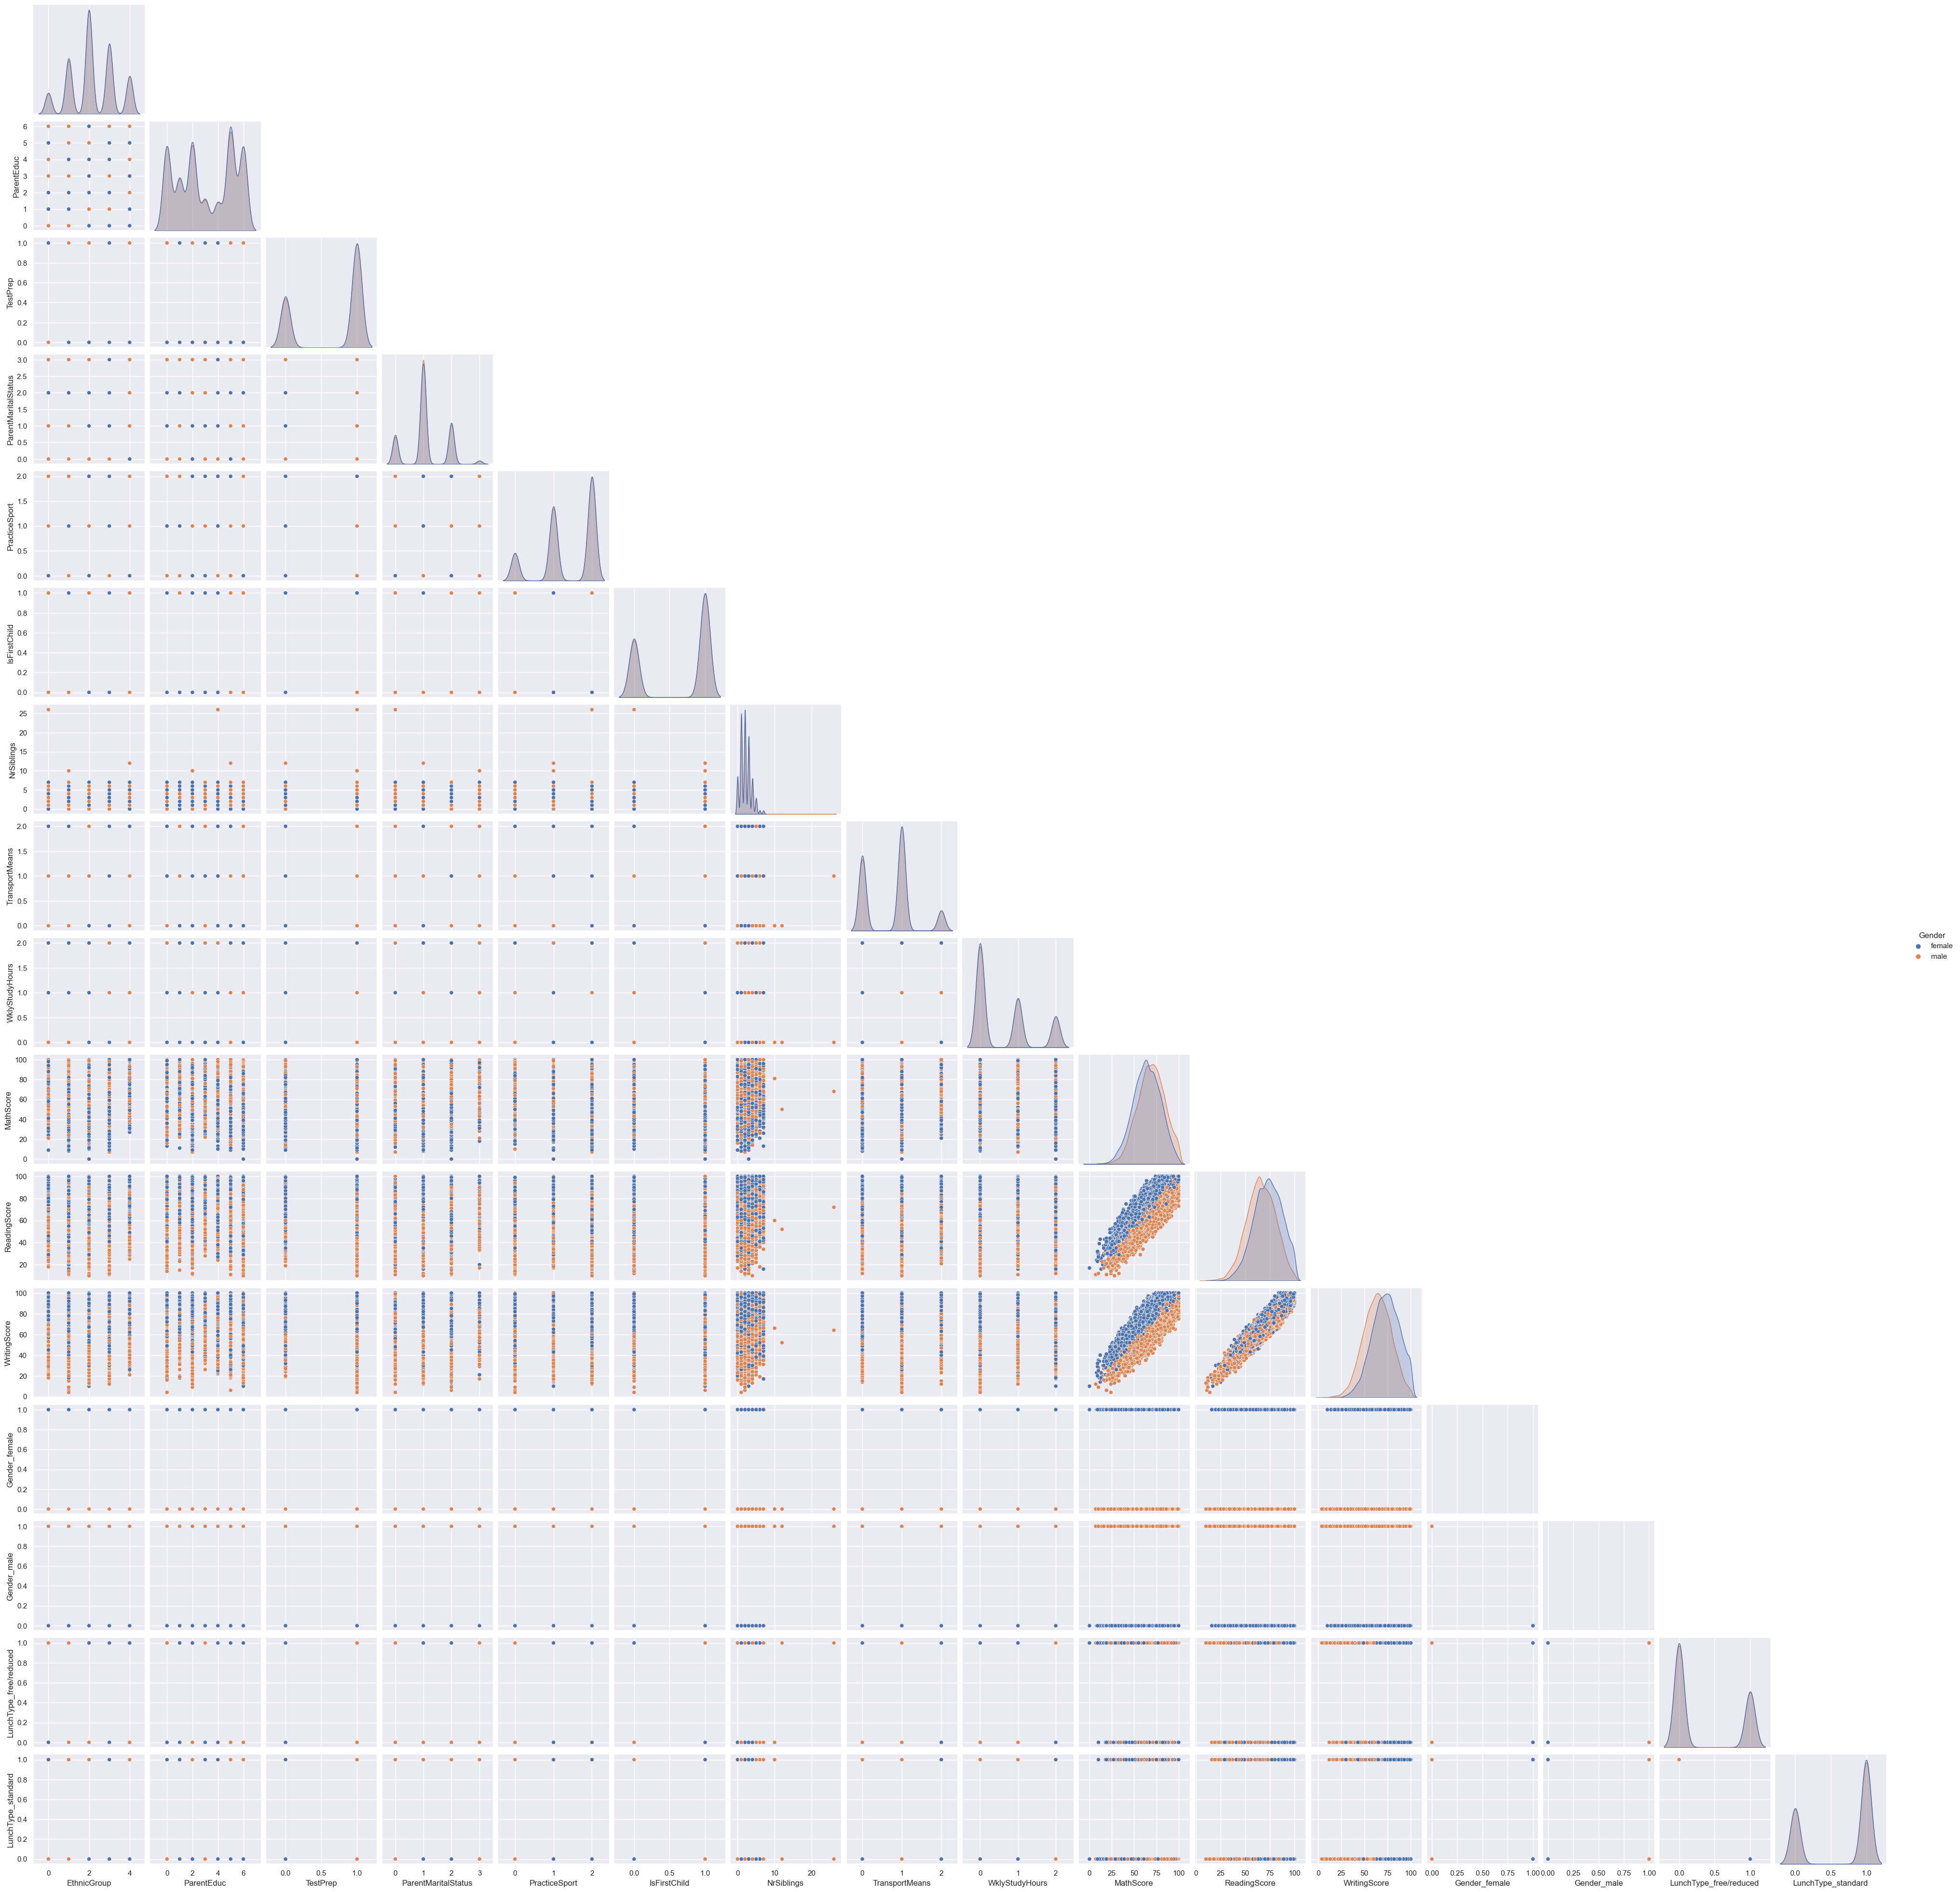

In [12]:
sns.set(rc={'figure.figsize': (25, 15)})

selected_features = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
                     'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
                     'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
                     'WritingScore', 'Gender_female', 'Gender_male',
                     'LunchType_free/reduced', 'LunchType_standard']
sns.pairplot(df.loc[:, selected_features], hue="Gender", corner=True) #corner=True da se ne zrcali
plt.show()


